# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: SeifAlla Okaib

ID: 52-1714

Tutorial: 1

---

Name: Hady Hashem

ID: 52-19326

Tutorial: 1

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/Summer2025/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


In [8]:
df.nunique()



,0
year,26
make,48
model,648
trim,1097
body,71
transmission,2
vin,46578
state,34
condition,41
odometer,39460


In [9]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [10]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [11]:
df['odometer'] = df['odometer'].str.replace('mi', '', regex=False).str.replace(',', '').astype(float)
df['sellingprice'] = df['sellingprice'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

In [12]:
df[['odometer', 'sellingprice']].head()

,odometer,sellingprice
0,50404.0,10900.0
1,17846.0,29900.0
2,21122.0,24200.0
3,145303.0,3200.0
4,6714.0,22100.0


In [13]:
df['interior'] = df['interior'].replace('—', np.nan)
df = df.dropna(subset=['interior'])

In [14]:
df[['interior']].head()

,interior
0,gray
2,black
3,black
4,gray
5,gray


In [15]:
df['car_age'] = 2015 - df['year']

/tmp/ipython-input-15-3921732469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = 2015 - df['year']


In [16]:
df[['car_age','year']].head()

,car_age,year
0,2,2013
2,3,2012
3,13,2002
4,1,2014
5,1,2014


In [17]:
df = df.drop(['vin', 'saledate'], axis=1)

In [18]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [19]:
def map_body_type(body):
    body = str(body).lower()
    if 'sedan' in body:
        return 'sedan'
    elif 'coupe' in body:
        return 'coupe'
    elif 'convertible' in body:
        return 'convertible'
    elif 'hatchback' in body or 'hatch' in body:
        return 'hatchback'
    elif 'suv' in body or 'sport utility' in body:
        return 'suv'
    elif 'minivan' in body or 'van' in body:
        return 'minivan'
    elif 'wagon' in body:
        return 'wagon'
    elif 'pickup' in body or 'cab' in body or 'truck' in body:
        return 'pickup truck'
    else:
        return 'other'


df['body_simplified'] = df['body'].apply(map_body_type)


df['body_simplified'].value_counts()

,count
body_simplified,
sedan,21142
suv,11737
pickup truck,3169
minivan,2589
hatchback,2186
coupe,1703
wagon,1397
convertible,925
other,742


In [20]:
df[['body']].head()

,body
0,sedan
2,Sedan
3,SUV
4,E-Series Van
5,sedan


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

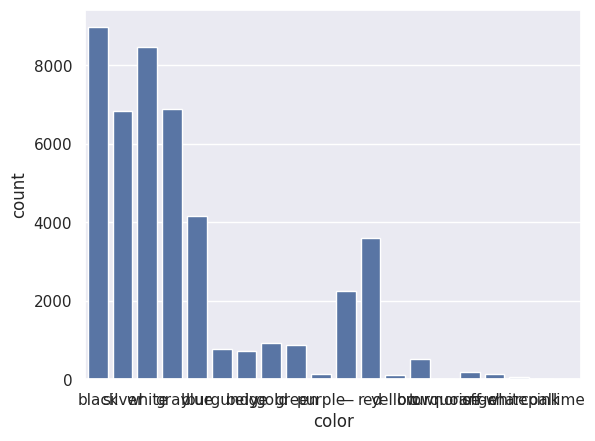

In [21]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

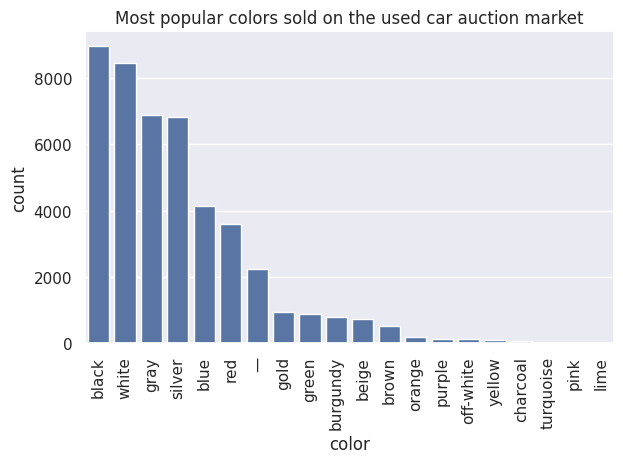

In [22]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

/tmp/ipython-input-23-920730637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


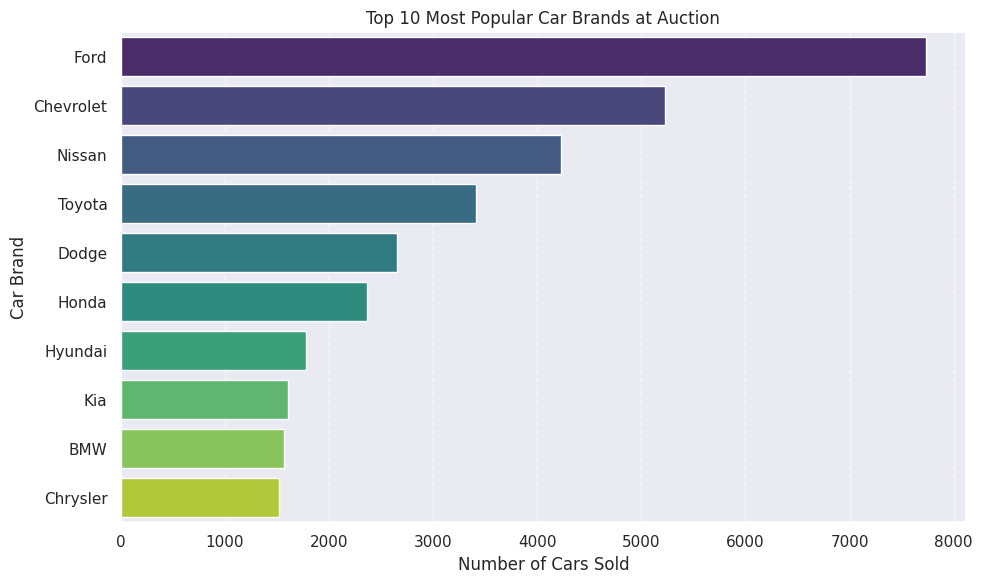

In [23]:
top_brands = df['make'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Most Popular Car Brands at Auction')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Car Brand')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Answer for Q1**:Ford , Chevrolet , Nissan
                  

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

/tmp/ipython-input-24-590531790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transmission', y='sellingprice', estimator='mean', palette='Set2')


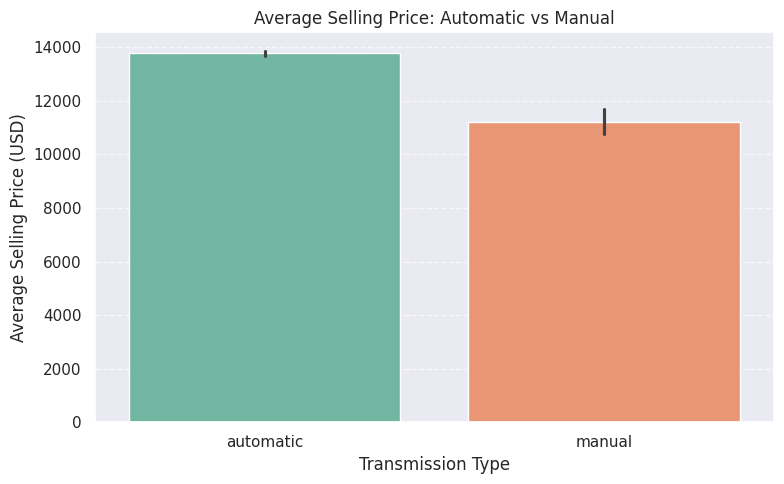

In [24]:
df['transmission'] = df['transmission'].str.strip().str.lower()

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='transmission', y='sellingprice', estimator='mean', palette='Set2')
plt.title('Average Selling Price: Automatic vs Manual')
plt.ylabel('Average Selling Price (USD)')
plt.xlabel('Transmission Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Answer for Q2**: Yes

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

/tmp/ipython-input-25-2560798940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_makes, x='make', y='sellingprice', palette='Set3')


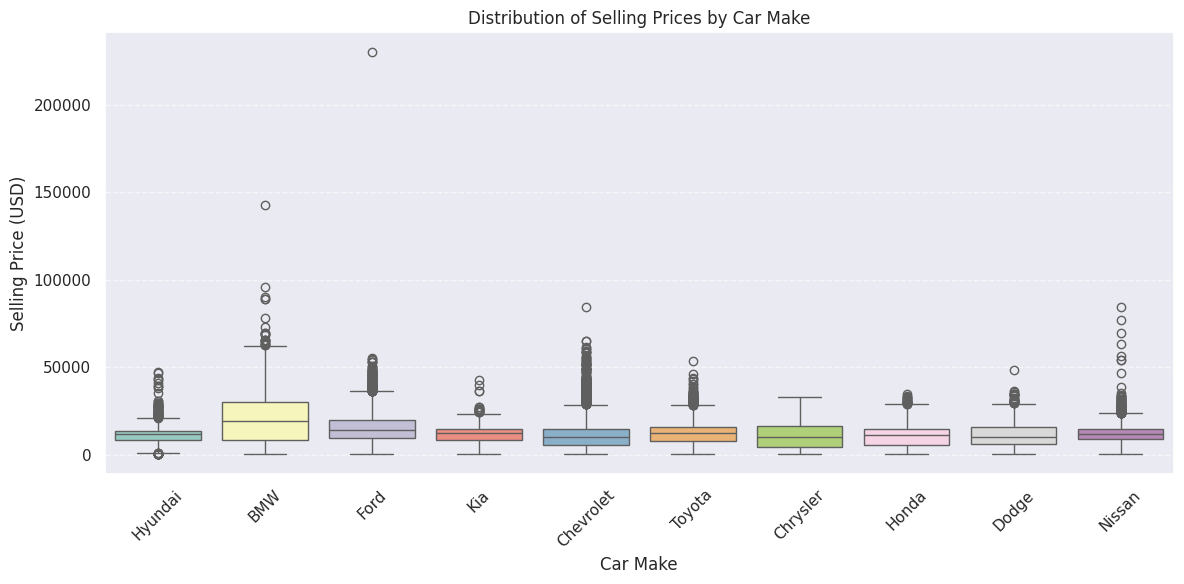

In [25]:
top_makes = df['make'].value_counts().nlargest(10).index
df_top_makes = df[df['make'].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_makes, x='make', y='sellingprice', palette='Set3')
plt.title('Distribution of Selling Prices by Car Make')
plt.ylabel('Selling Price (USD)')
plt.xlabel('Car Make')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Answer for Q3**: The widest distribution of selling price is BMW and Chevrolet , Car makes are the most expensive are BMW and Ford

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

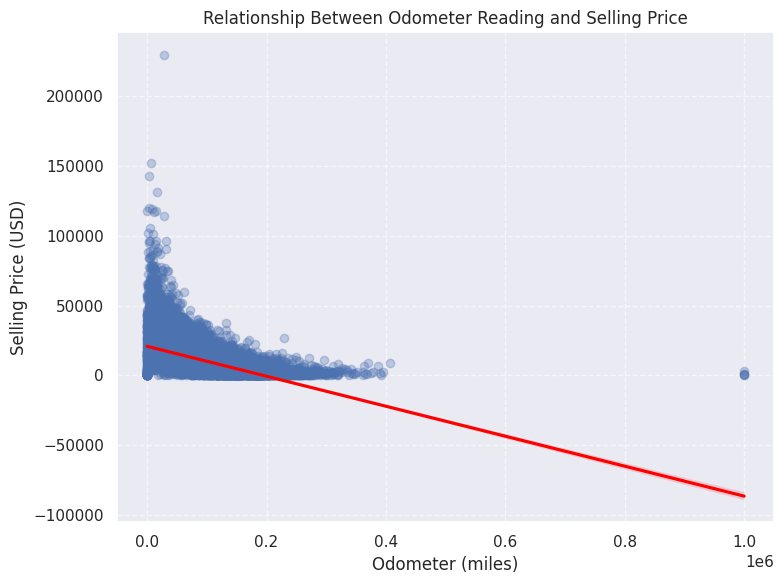

In [26]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='odometer', y='sellingprice', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Relationship Between Odometer Reading and Selling Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Answer for Q4**: Negative correlation because -ve slope

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

Pearson r = 0.528


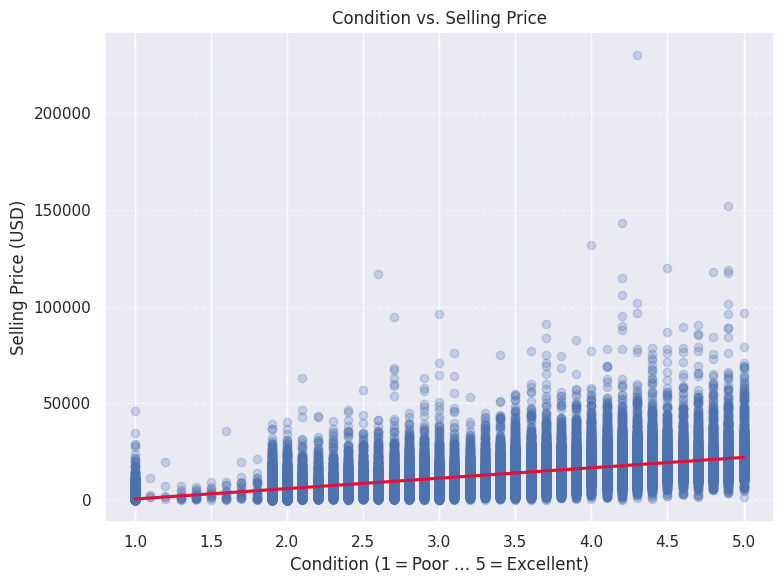

In [27]:

df['condition']     = pd.to_numeric(df['condition'],     errors='coerce')
df['sellingprice']  = pd.to_numeric(df['sellingprice'],  errors='coerce')


cond_price_corr = df['condition'].corr(df['sellingprice'])
print(f"Pearson r = {cond_price_corr:.3f}")


plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='condition',
    y='sellingprice',
    scatter_kws={'alpha':0.25},
    line_kws={'color':'crimson'}
)
plt.title('Condition vs. Selling Price')
plt.xlabel('Condition (1 = Poor … 5 = Excellent)')
plt.ylabel('Selling Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Answer for Q5**: Positve correlation because +ve slope

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

/tmp/ipython-input-28-2218339785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_body.index, y=avg_price_by_body.values, palette=colors)


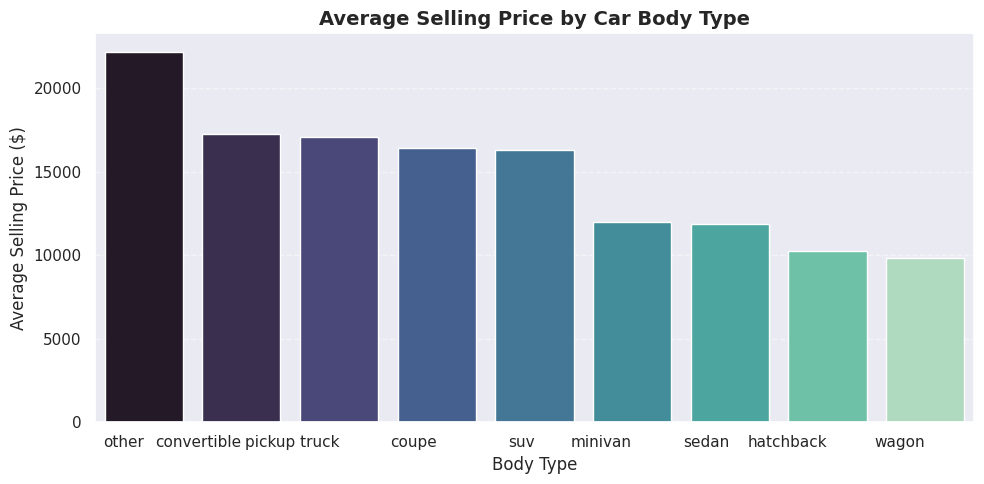

In [28]:
avg_price_by_body = df.groupby('body_simplified')['sellingprice'].mean().sort_values(ascending=False)

colors = sns.color_palette("mako", len(avg_price_by_body))

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_body.index, y=avg_price_by_body.values, palette=colors)
plt.title('Average Selling Price by Car Body Type', fontsize=14, weight='bold')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Visualization**

**Answer for Q6**: The most expensive car body type is typically a convertible or pickup, coupe .

The least expensive body types are  wagon or hatchback, likely due to their compact size and market demand.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [29]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,car_age,body_simplified
0,2013,Hyundai,Sonata,GLS,sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,10900.0,2,sedan
2,2012,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,24200.0,3,sedan
3,2002,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,peddle llc,3200.0,13,suv
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,wa,4.9,6714.0,white,gray,u-haul,22100.0,1,minivan
5,2014,Kia,Optima,LX,sedan,automatic,co,4.6,8386.0,black,gray,"kia motors america, inc",15500.0,1,sedan


In [30]:
cols_to_drop = ['vin', 'saledate', 'trim', 'seller']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [31]:
df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,sellingprice,car_age,body_simplified
0,2013,Hyundai,Sonata,sedan,automatic,ma,3.9,50404.0,black,gray,10900.0,2,sedan
2,2012,Lexus,IS 250,Sedan,automatic,fl,4.1,21122.0,silver,black,24200.0,3,sedan
3,2002,BMW,X5,SUV,automatic,fl,1.9,145303.0,black,black,3200.0,13,suv
4,2014,Ford,E-Series Van,E-Series Van,automatic,wa,4.9,6714.0,white,gray,22100.0,1,minivan
5,2014,Kia,Optima,sedan,automatic,co,4.6,8386.0,black,gray,15500.0,1,sedan


In [32]:
non_numeric = df.select_dtypes(include='object').columns
print("Non-numeric columns before encoding:", non_numeric.tolist())

Non-numeric columns before encoding: ['make', 'model', 'body', 'transmission', 'state', 'color', 'interior', 'body_simplified']


In [33]:
df[non_numeric].head()

,make,model,body,transmission,state,color,interior,body_simplified
0,Hyundai,Sonata,sedan,automatic,ma,black,gray,sedan
2,Lexus,IS 250,Sedan,automatic,fl,silver,black,sedan
3,BMW,X5,SUV,automatic,fl,black,black,suv
4,Ford,E-Series Van,E-Series Van,automatic,wa,white,gray,minivan
5,Kia,Optima,sedan,automatic,co,black,gray,sedan


In [34]:
df = pd.get_dummies(df, drop_first=True)

In [35]:
df.head()

,year,condition,odometer,sellingprice,car_age,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,interior_white,interior_yellow,body_simplified_coupe,body_simplified_hatchback,body_simplified_minivan,body_simplified_other,body_simplified_pickup truck,body_simplified_sedan,body_simplified_suv,body_simplified_wagon
0,2013,3.9,50404.0,10900.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2012,4.1,21122.0,24200.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2002,1.9,145303.0,3200.0,13,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2014,4.9,6714.0,22100.0,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,2014,4.6,8386.0,15500.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Modelling

_Apply the linear regression model below._

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [37]:
lr_model = LinearRegression()
X = df.drop('sellingprice', axis=1)
y = df['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = lr_model.predict(X_test)

In [39]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("📊 Linear Regression Performance:")
print(f"  - R² Score:                {r2:.3f}")
print(f"  - Mean Absolute Error:     {mae:.2f}")
print(f"  - Root Mean Squared Error: {rmse:.2f}")


📊 Linear Regression Performance:
  - R² Score:                0.821
  - Mean Absolute Error:     2521.66
  - Root Mean Squared Error: 4105.20


In [40]:

results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred


results_df[['Actual', 'Predicted']].head()

,Actual,Predicted
19031,13100.0,12805.694722
2420,10200.0,11315.363018
20516,9100.0,18699.085893
30227,6400.0,9960.237214
24553,78500.0,36849.883511


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [41]:
y_pred = lr_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(" Linear Regression Performance:")
print(f"  - R² Score: {r2:.3f}")
print(f"  - MAE: {mae:.2f}")
print(f"  - RMSE: {rmse:.2f}")


 Linear Regression Performance:
  - R² Score: 0.821
  - MAE: 2521.66
  - RMSE: 4105.20


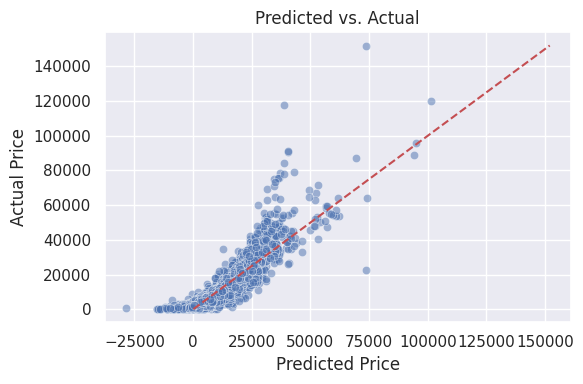

In [42]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted vs. Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

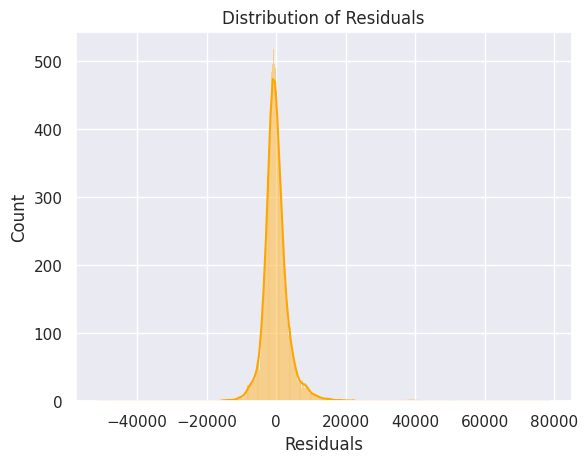

In [43]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

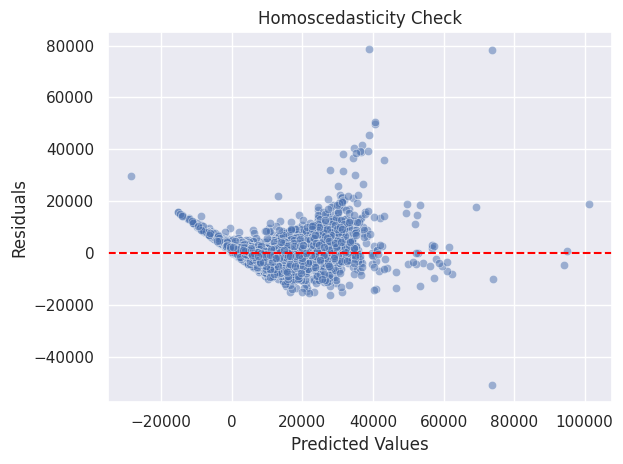

In [44]:
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The model gave good results with an R² score of 0.82 and an average error of about $2,500. This means it predicts car prices fairly well, but not perfectly.

Some problems may be due to missing features like accident history or location. To improve the model, we can use more advanced algorithms or add more useful data.

Yes, we would recommend this model for a used car dealership to get quick and fairly accurate price estimates.

In [45]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

price_median = df['sellingprice'].median()
df['high_price'] = (df['sellingprice'] > price_median).astype(int)

X = df.drop(['sellingprice', 'high_price'], axis=1)
y = df['high_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_preds = dt_classifier.predict(X_test)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)

def evaluate_model(y_true, y_pred, name="Model"):
    print(f"\n{name} Evaluation:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, dt_preds, "Decision Tree Classifier")
evaluate_model(y_test, rf_preds, "Random Forest Classifier")



Decision Tree Classifier Evaluation:
Accuracy:  0.8946
Precision: 0.8993
Recall:    0.8889
F1 Score:  0.8941

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4556
           1       0.90      0.89      0.89      4562

    accuracy                           0.89      9118
   macro avg       0.89      0.89      0.89      9118
weighted avg       0.89      0.89      0.89      9118


Random Forest Classifier Evaluation:
Accuracy:  0.9197
Precision: 0.9290
Recall:    0.9090
F1 Score:  0.9189

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4556
           1       0.93      0.91      0.92      4562

    accuracy                           0.92      9118
   macro avg       0.92      0.92      0.92      9118
weighted avg       0.92      0.92      0.92      9118



We compared two models to predict whether a car’s price is high or low based on the median value.

The Random Forest Classifier gave better results than the Decision Tree in terms of accuracy, precision, recall, and F1-score.

This is because Random Forest uses many trees instead of one, which helps it make more reliable predictions.

So, we would recommend using the Random Forest Classifier because it performs better and is more accurate.